In [48]:
## Author: Sebastien
## Date : 22/06/2020

# Import required packages for this notebook
import numpy as np
from matplotlib import pyplot as plt
import IPython
from IPython.display import Image
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

np.set_printoptions(precision=4)

# models.py contains the same classes we defined in the Notebooks
from models import GeometricModel1R, KinematicModel1R, GeometricModel2R, KinematicModel2R

In [49]:
class Model1R:
    '''
    Environment class for the 1R robot kinematics + geometry
    '''
    def __init__(self, L=1.):
        ''' 
        Initialize model parameters
        '''
        # Number of joints
        self.nq = 1
        
        # Geometry + kinematics
        self.geometry = GeometricModel1R(L)
        self.kinematics = KinematicModel1R(L)
        
    def animate(self, q):
        '''
        Animate a given sequence of joint positions
        '''
        self.geometry.animate(q[0,:])

In [50]:
# Calculate desired joint trajectory
class KinematicPlanner:
    
    def __init__(self, model=None):
        
        # Model (geometry + kinematics) 
        self.model = model
        
        # Number of joints
        self.nq = self.model.nq

    def plan(self, p, pdot):
        '''
        Calculates the desired joint trajectory achieving an input end-effector motion
        Input : end-effector positions, velocities
        Output : joint positions, velocities
        '''
        # Get number of steps
        N = np.shape(p)[1]
        
        # Initialize joint positions and velocities
        q = np.zeros((self.nq, 50))
        qdot = np.zeros((self.nq, 50))

        # Get plan using IGM and IKM
        for i in range(N):
            q[:,i] = self.model.geometry.IGM(p[:,i])
            qdot[:,i] = self.model.kinematics.IKM(q[:,i], pdot[:,i])
        return q, qdot

We define the desired task space trajectory

Text(0, 0.5, 'y_p (m)')

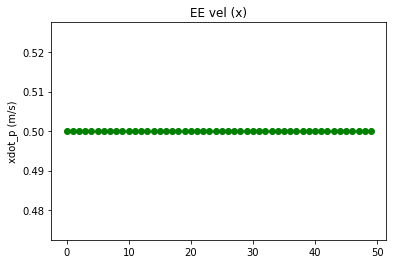

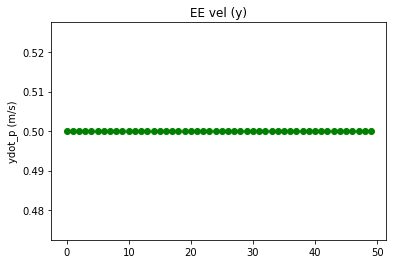

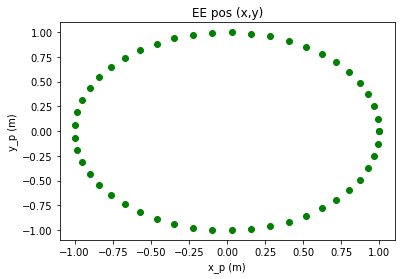

In [51]:
# Number of points
N = 50
# Desired end-effector positions p1,...,pN = circle 
x_p = np.cos(np.linspace(0,1,N)*2*np.pi)
y_p = np.sin(np.linspace(0,1,N)*2*np.pi)
p = np.array([x_p, y_p])
# Desired end-effector velocities pdot1,...,pdotN = constant v
v = .5
pdot = v*np.array([np.ones(N)]*2)

# Plot desired end-effector trajectory
plt.figure()
plt.plot(pdot[0,:], 'go')
plt.title("EE vel (x)")
plt.ylabel("xdot_p (m/s)")
    # q2
plt.figure()
plt.plot(pdot[1,:], 'go')
plt.title("EE vel (y)")
plt.ylabel("ydot_p (m/s)")
    # q=(q1,q2)
plt.figure()
plt.plot(p[0,:], p[1,:], 'go')
plt.title("EE pos (x,y)")
plt.xlabel("x_p (m)")
plt.ylabel("y_p (m)")

Now we use the `KinematicPlanner` class to find the corresponding joint space trajectory

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAABBbm1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIHIyODU0IGU5YTU5MDMgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE3IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9OSBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjAgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAABdtZYiE
ADf//vbw/gU2O5jQlxHN6J0zH78VuLo0N73OAAADAAA33SOPPF3YZgYAPnkfalDBQvuDeYuR4gQQ
33H1JsIsldiZ1tRb1HLwuEexcKBYOl0dI0TzqGdiK70AABR3slWIsDbfLsv1oO4pARGXtakA9PU2
YzrOoWlUBTTddkU+k16fLg7/cH2IRMYIjhwpMLVVe9bIWgxA2+1J3xWQ/xZhfWMSjGouZobSgaF5
xDqaJRCVEngZ2Nmy0XwDSXBwLKu9zfFlTvIO3qGjMdI5JNjENMpNWxwFqgGx9A9lceCqNXZpNIRC
1IQzUTlrZYWQycQCHipOBvGtoHeyeztH+qiqYT8AmuzjehKagEDWMBDzzYRkchZD1xsYO9/+jmyb
HXHswqvaC73GGtJwqBFXTUUcUnWYsWNdkOkXEZLNoxTxP2k35p29gTDGQAMXuZe6ZQgD5vtMUu8z
Pfj/np2AqsemRtRtNOpGlrVYI+U/vLxGIYhtrbqyot6W81/szOZyVQUoA1uGmLT7Pqp3Z+ICBaeg
wAusMFT3Lb5zbJ+K3CSqLbOzDpvmDGuDbgIxs0xl91OlssQQhZN2H+IXmd0w31SLsRzZ1seEaDDC
cjMmsYuvGnA6Of8O8Obba+btpjVLUlHLqqirNtKiXBZyRkMTquJGFMqRKB196V/BP3D2EQSaX+k/
i0yzfrAhiZE5ut3cPB9k5dnds96AnqVVbyyZ6K+fS8P9XYz28WPR2W83Zgmy+NyGzWLprF9PwU19
6nrm6jy5blY0LN+HOWAPcDs0uvf+/pYurkBLIq2pAE0gHEKo2ZkBk0/ezBINZqddLyI44WLvoLf6
WuQIqenu+tYLgbwz6R8ugFIC21ZcrE4fLEHFhT67lW9mqzo47LI6o+qQMX2rE7Ox44Wm4PPsgHOw
YQ48C8Mk+aQzXPAB2JisxGl2y0/TvmRGe/hKTR4Z1Af98ZB6ZmaGsU1dRclETU/u8+a5UL5nfvcv
ACHzXDq2IRWtyCrN7u3ajWhurgONsW4RnhMf96OiDW8atdFv1D3XLi+ICcqraWwaPrBpWClWujmu
PWODYrxz9mOnugEtCvn//wzcvbAjax1+EJ4r0gpUB/32gaZZbvm2g+q2b/+isxHJZCTZoOvxWPwO
ZWRfHkqM5OUxwOWhtbJ+7uEI7MvJKymnq14xZGVTUPcLKWPsVoXFYFiUivm/G+WaaYzbvX+jR7MF
2fx7P1xGU0IVvKe1IAjdkBRU+srY/sPHe/ZeOv8N820EIEonny39GcGn/Gg65zfLS4K/wPmHCp+o
ww/AV6C2LkncY99OhCZCWb85Vk0F/upprWO27EQKB9VBy01K3f/t3/c5yagMf1JykqyU1vp/qw+u
33vgqUinqO58imYDHfErAWY5zGvLdCDm8c/UwXUmCkwp17HQkjtalp1PDpvAcP0I90o6w/IeNKaB
o2VvVE/csVyphmUF3UHStQ8DfkOws+3KQBFYnLUUt+yHp/PlcZda/VST6h7YObKipoDttbYbIlaR
YEpqyrqXo92+RJ6YC/Yjku2sjBJUfpT2kN9AeS+HW+c0520v2WDcXPcZuA2RnC/0dyRLlEgCnJJ+
u055TnIr2oe0SUlgFYXiGakWzz8yvS1uTjK2sB7g4pa9L47zgFJPxZUPfTlo14Ktqn7eeZTS6KxR
33GwAVGHtZlZiYHMv5+ApslvKBcPJah0XWvKF2KPEXHdl2VMMdnYa+kKOdO1AUAAdAq0xSEyQme5
iwErHriDoPXnl8LZa/rnYy018Q0JabWCHAr+r9zbd5v1cnnp44Ja/Beo+TzFX6Qn0+6y+01Pplpa
+CaClZ37vIuBT4Akqr5m8VpmtguAemJ6mlVZjlJn/10aC4sllqBNBhu4SIkoJjeY4UOcA3yF1J2I
Xpg4VxJhXxE+9TarF9Y2KDXdHtg5Exo+IPMQpdneQIlAA+MKTsCda6tSwYzoBjxRwCv30qpYj+l5
ehHj75XvQIAS6yfdwiNnK4e7PaudKlNPjRRrUyAh5RgA6+1c5kGxq/GMX8gNgqGvlYboijOg1+Xa
dqbMz9FtXNO7qTs5kXmnVjmRJiCC6n6G8Lii4LXQt67Un2nUr5oIRtivanCYszPLPqgqFOMeK/RI
rtN+2x878vet2XxsMfvSlcje4hXL3BGQ6C7nxG79hvbgku7YqiA02F/CkorsGQ01DgnpJ4jYhKiw
xl3Qf5+sBbabeL2kWMilJ+yln0B0wfVu7xAqq6eVQA3MauCZNRN7h+Qu3yX8mmYigAZsDGAsmt28
v5dmEPWO3Re10jGivaWfKxKVAprupSKgMxnL8SBpyMYiCSEYq8EwVn2CUV5RjLmKJ3n9N+h1y5sU
ZBwxTYewduF7ALRCJxGSEjowwEWghgD5j/Osa7mwpHseUQrufxqEm6iwi8eBr15+DIQEe18CI0Qy
BhQJTK5MdzWuB7KIjJSuuOgiLWWgaymsOSGXvcanjKcQKrBtv5+ZBkCywb/vyJnE/lxAYryh2KFa
j/KYshnMQiv/+Qx8zErIKoZalajYqsR4e1PDtp9rvR/kfjQgbiauzXwzUkpeeQvfFjCwvaNN20dQ
YE4hsJRDhwT0rtbzwyt2PYCpHsJJIF5rOytZEg00pbIC2Np0t4VQ5qvBqdnxDKc6i+oThpImgqyW
sdvSgmlKldbdVrKI+GjdTol3NX89gFUQxTXyjnQ13ckrM4GVdGjf4/4zxxfmOZYMY2XFtNilqWNo
1Tmvhpq2wCYbqkAQCNP54qsTrNwHdO3F+66HPRjm3u/P34weFXznmgclq5yLdyez/2JAKRqDxDu0
MIhghKdjrvkzi38D5fe3/lWDh2zcNBMmhPAvhrIEHRYaylG01IafkgbKuik6xJZg7joAIUSBZrrK
ugOZdVFk9DVHBUfdbeOKv

Text(0, 0.5, 'qdot (rad/s)')

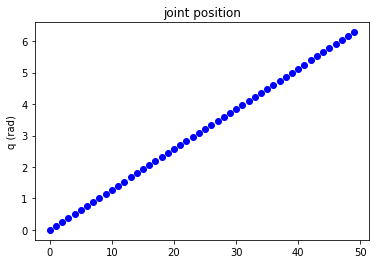

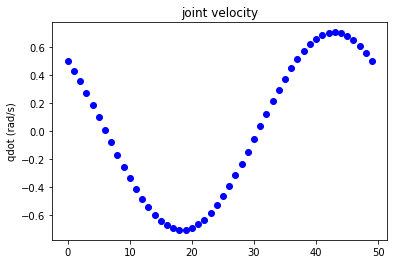

In [52]:
# Create a full model (geometry + kinematics)
model1R = Model1R()
# Create kinematic planner
planner1 = KinematicPlanner(model1R)
# Plan
q, qdot = planner1.plan(p, pdot)
# Animate 
model1R.animate(q)
# Plot the joint trajectories
plt.figure()
plt.plot(q[0,:], 'bo')
plt.title("joint position")
plt.ylabel("q (rad)")
    # qdot
plt.figure()
plt.plot(qdot[0,:], 'bo')
plt.title("joint velocity")
plt.ylabel("qdot (rad/s)")

In [57]:
class Model2R:
    '''
    Environment class for the 2R robot kinematics + geometry
    '''
    def __init__(self, L1=1., L2=1.):
        ''' 
        Initialize model parameters
        '''
        # Number of joints
        self.nq = 2
        
        # Geometry + kinematics
        self.geometry = GeometricModel2R(L1, L2)
        self.kinematics = KinematicModel2R(L1, L2)
        
    def animate(self, q):
        '''
        Animate a given sequence of joint positions
        '''
        self.geometry.animate(q)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAABOKG1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIHIyODU0IGU5YTU5MDMgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE3IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9OSBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAABPVZYiE
AC///vau/MsrRwuVLh1Ze7NR8uhJcv2IMH1oAAADAADVayF8oYJVUBjgvNA9NyX0pOD8+0aEKaS/
W+kRxFrWNzf+eSO4TQp9X9rSQjTItyhp18FcAAFYwPSb9MNj7345mZM2SCpqc/4dq8TkXuq00M8Q
OvVEaAcaB8dFKy0nxv6lS/KsJVTGkw7kt4VpUBgOXNkT5vbbHpQLGFTaisacVyNWLNCImxrwyoEY
lJx5jyLlf5PD8ImwFKMLmZhi2TEEJtj8GV9R/UBB/NoG1pPsaybMUxhEHsOgEs62wUO93ABvLX+J
guKr6s2LSTTKYqZ2uyU+ivbj9KDweAkr2f6MFX2NcBz4Zq8fYQnNHf1lRK6Qz0VRcx29SzyxxjZW
BgROfxkIr3mcfF10QJSzwmXqXbukSs4qLlxMG+QUVoZ+fBZDXj6sUq5nWR2PfAossU0QP8QysOQm
vbshV9jJbK+WR2NCqnyZmsif1msgleTZXxp/q1rm41dO18wP+2Dvj4kyx08ufBRzcpC9XZ1QLle3
gJX1jL4Uekv/9WZfLQ58T+1+4J8CCkOAcwpsfNaYdr4KTPs6Yih/ihyDruJeDn339+KJPTtFyNnp
l+CIgChcecnihxc7yDKgwJW6LRUkV43ZVvYE9jwyP+1Vl8sdFrKxunXm1NnGq6o63XEEIia7BYfS
RFGWRjl9IXfCrMJDsKM24UcMyT/NXhtSjg92rHNf6hb782haw5xII/A+v3M+lb0yG2EwYCvUCncr
MUFucpjSLceHYZNk1qAKYe5Frqp7V5+b6aAat6s9UVCrhf/IMmGHlDpzrcA5LkkPbDhz/3XCHRnk
qtTjoEaVNkzOEcPEA7XsgZj2TuYJtFi8H1ZehPtxinBKwZ8GJ5u2y2gqAed0dVQu1HBxuQx7dwn1
KirtGFbtXoFsU56PFHOhbmnBDIkQ1tH9ovW4SJYOdF0Ek4hF/tAl3GT6yvxWKpPucN8E6JkvubG3
m8W4pB0CsyVda8vYxefMgu/rE8uzeufAGVBRxZDGQX8MLR67ajaJobdLb9RR/JY5v7yamq9EmbGo
cb6GLGOCalqSFmQMOgWDgRLfYMMfgqZpPAW4TCdIYyFCnJT/SvWWm/7JjVA+qcAl/9EbJ0dIrsrz
qAaFjvnVzwaK23SKdxkuqQ9YJSi0NprtajhXLJyseQ0VeLswi+s7/pvC8eK08Cwk1uQAdSP+/CbT
J4tavtYeQkbwUytSm4uKbLTdGzTyskuqA0YW7GjQ9g+YlvYKD00f034wU21oAUM7pCOpZwlFP6cH
jdgRapfp5qO97SSQbg7YGx9RgPKtRL0dvdvy/zUGKg5UGlTWKvQzYTLWsN9OYs0y9yXQ7Ec2S172
TTLfAH1qFF5yr4vl+ETilFZU5fcvh4XfszZwShWB0kfyzb+xCX0n1FRHgbTcWlN21sstT+Vv1sx/
6FHjWUYcn66RGm4QveOyfb8e6sAkwP4H1NVg/RmkWAdE7rU8QIR+RpheZq1myL0ntqDAGVQ29+m9
mg15NV7klU4RlaEsPmAL0RUbKMPgevKS8Hff4YQL70U1soq3jtqav/y+zgKOahDV+L9qVC7icgGo
DVa0i8u/nHFkB2WAWvKWPv2+oD4WFznCw74HY42DBwT9gt/mlIFTholP94bx6zyRBFwigMkj87+a
EV4uOeL/07wbB2hRD9jKGeAhWImC9FHG9iH+8j+v3r2vieyfyBG1+XHnH6aMppH7G64bdnfJRMjb
2bl3ZQypasN1ikIlN+X86dJNnmWPT3nix17egj3dt8bdqrr+dSGTiKJum/5WM9rA/m5o/h0biQKO
jWtsIiKgq1n0t9cHbpc7h8QQViRu4cf9VN0FWv2kR2vAyl6U0OBuDg0CyV5jtoqJm0gDUW8aMITD
YTb1Fvx46yYdXzeaGbZOUdN/rrCYWsKdFc1y9CW7/7k5PTAIXTfm+sfG8ecjXjVT+4d6HctdMudX
wRPpdOT/2uH0vzox2ujBSohbzLR2Ynud5pYZp4ex17T6Msf5+zk0Ms9yuk+6rCiSJWlIeSjF1SOE
Cr1osu4otKLguwrxFSYTea4TypFgVkzXp7lXlTajQev0l85igpp9XdlRffLtY40XGYjK+k0+Pzkl
9cnQWXf9MPV7Ld89MGsldvk3Dvl/S1GymmK1Jn7aQVoof+vqnqkCUg+JMi7itvUC7/iRuvJVUN8/
uuh6z3RstOhgil7EM54EYAsE2jFE315Tn9x/v1fB7SLAG73+M2ihstLkggKvC7Dr1cuj+joHVmVY
9Q+SY9dMseBj7emTRYKubDhlMT7GebFZdTJO8PRzR19wsslmQnPNLE0Yw6GiwSjnY1spNDPIfFVz
FD7DRRU2oOFKE8mMFvvBAHcglTWlcFHzS0rtX21b4jK97JNmywEBeHGEppimHT3rI4Ne0efuLnl3
ZH/D0GTeJ5ewRa234r36DbFX1eQtrRpTeF5Roa1CfcGL/JV2IPBPV8DDHJCpeswy1KtQu8Crv6Sn
33C8p/w1h0kDKc1HbstFsqfqlIfifaZaqtQOldIkETggL1zf4o0ye1nFhh+gad+3nO7EmUvH2WXq
FgvcakG9s8j/WGmcQpTn5YUYSqPUsK1b4ogbrZC9awZDoUss1+oEjyFyRomAkz4vx+L3QMeYJUfQ
Z1b84IJ7YTca7hTpB0B4gJlp9KDJlIYeA+bsWnff3Uw/Axs7P/Mh3ZrUyX/+3/y1Y8kNhXOfZXgh
WkBGOtu6lnlf/C+vtKJrA6Mz/WTGLEhpVB2Y/s4vhSPGiQ39A1SoIirvkoEutsNd2m5TUWKab+E2
AUJbxc9woQDb6XS2VUgLJHhmfkyms/1XzrAHxtbSS7gv03AIJyx44XNCRYAoWOcP8BJTkH0GVsZn
3pQZfY0AeA7OA+xhv5WyP

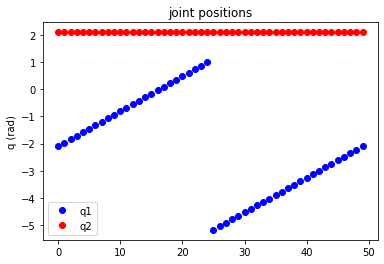

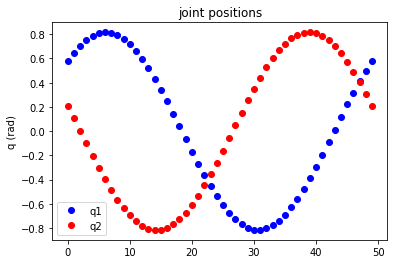

In [61]:
# Create a full model (geometry + kinematics) of the 2R robot
model2R = Model2R()
# Create planner
planner2 = KinematicPlanner(model2R)
# Plan
q, qdot = planner2.plan(p, pdot)
# Animate
model2R.animate(q)
# Plot the joint trajectories
    # q
plt.figure()
plt.plot(q[0,:], 'bo', label='q1')
plt.title("joint positions")
plt.ylabel("q (rad)")
plt.plot(q[1,:], 'ro', label='q2')
plt.legend()
    # qdot
plt.figure()
plt.plot(qdot[0,:], 'bo', label='q1')
plt.title("joint positions")
plt.ylabel("q (rad)")
plt.plot(qdot[1,:], 'ro', label='q2')
plt.legend()